# Wstęp do uczenia maszynowego
##  Projekt nr 1
#### Jakub Piwko, Malwina Wojewoda

#### Pakiety

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split

### Dane i ich opis

In [3]:
census_df = pd.read_csv('census_income_dataset.csv')
census_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
pd.set_option('display.max_colwidth', -1)
descr = pd.read_csv('attributes_census_income.csv')
descr

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


#### Analiza braków danych

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  48842 non-null  object 
 14  income_level    48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


W ramce danych nie wystąpują wartości None/Null, więc nie będziemy musieli zajmować się uzupełnianiem brakujących wartości. Z opisu ramki, wiemy, że takowe braki, jeśli występują, są zakodowane odpowiednimi wartościami w kolumnach:  **?** dla danych nominalnych oraz **-100000** dla numerycznych.

##### Średnia, wartości minimalne itd. 
Warto sprawdzić jaka jest średnia, odchylenie standardowe, wartość minimalna, maksymalna oraz kwartyle danych w poszczególnych kolumnach.

In [7]:
census_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Rozkłady zmiennych


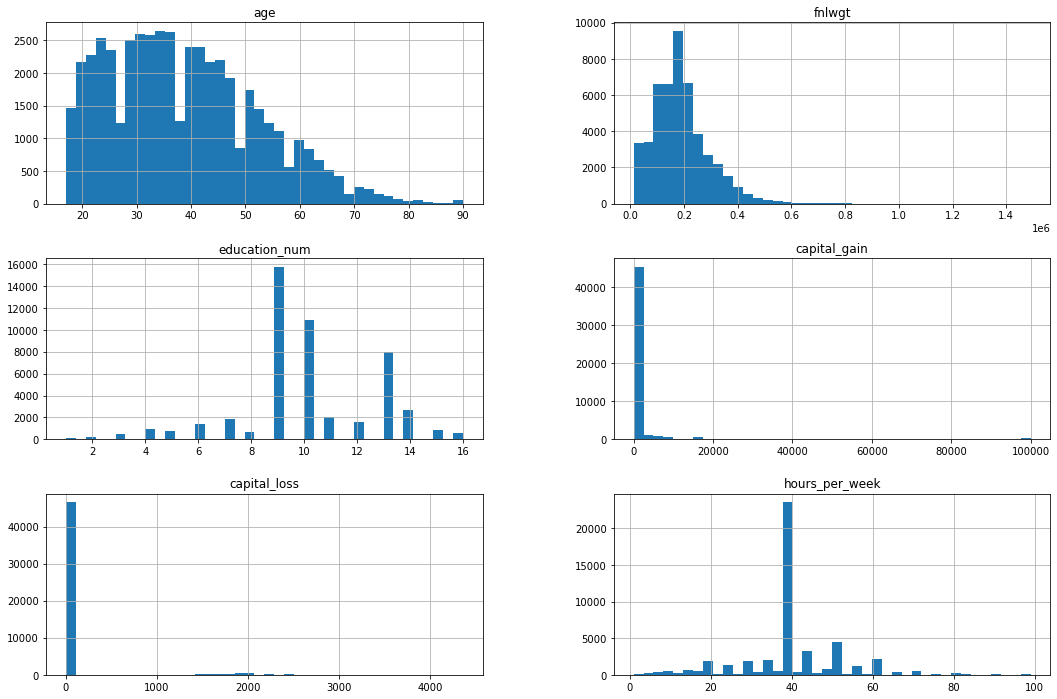

In [9]:
census_df.hist(figsize=(18, 12), bins=40)
plt.show()

Zamiana wartości ostatniej kolumny:
* z <=50K na 0
* z >50K na 1

In [17]:
census_df['income_level'] = census_df['income_level'].replace(['<=50K','>50K'],[0, 1])

##### Korelacje

In [23]:
fig_corr = px.imshow(census_df.corr(), color_continuous_scale='RdBu_r', range_color=(-0.5,0.5))
fig_corr.show()

Interesuje nas jak zmienne korelują ze zmienną *income_level*, ponieważ właśnie ją będziemy przewidywać. Widać, że wszytskie, z wyjątkiem *fnlwgt*, korelują z nią dodatnio. 

In [24]:
#NIE WIEM COŚ KOJARZE ŻE MÓWIŁ ŻE WSZYTSKIE MAJĄ KORELOWAĆ W TEN SAM SPOSÓB AL ENIE JESTEM PEWNA